In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt

In [2]:
# Load the datasets
price1999 = pd.read_csv('C:/Users/Bwah/Desktop/488 Dataset/ResaleFlatPricesBasedonApprovalDate19901999.csv')
price2012 = pd.read_csv('C:/Users/Bwah/Desktop/488 Dataset/ResaleFlatPricesBasedonApprovalDate2000Feb2012.csv')
price2014 = pd.read_csv('C:/Users/Bwah/Desktop/488 Dataset/ResaleFlatPricesBasedonRegistrationDateFromMar2012toDec2014.csv')
price2016 = pd.read_csv('C:/Users/Bwah/Desktop/488 Dataset/ResaleFlatPricesBasedonRegistrationDateFromJan2015toDec2016.csv')
price2017 = pd.read_csv('C:/Users/Bwah/Desktop/488 Dataset/ResaleflatpricesbasedonregistrationdatefromJan2017onwards.csv')

In [3]:
# Merge all price data into a single DataFrame
prices = pd.concat([price1999, price2012, price2014, price2016, price2017], ignore_index=True)

# Convert the 'month' column to datetime format
prices['month'] = pd.to_datetime(prices['month'])

# Display DataFrame summary to confirm the merge and data types
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932372 entries, 0 to 932371
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   month                932372 non-null  datetime64[ns]
 1   town                 932372 non-null  object        
 2   flat_type            932372 non-null  object        
 3   block                932372 non-null  object        
 4   street_name          932372 non-null  object        
 5   storey_range         932372 non-null  object        
 6   floor_area_sqm       932372 non-null  float64       
 7   flat_model           932372 non-null  object        
 8   lease_commence_date  932372 non-null  int64         
 9   resale_price         932372 non-null  float64       
 10  remaining_lease      223322 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(7)
memory usage: 78.2+ MB


In [4]:
# Get unique years from the 'month' column for rows with no missing values
unique_years = prices.dropna()['month'].dt.year.astype('int64').unique()

print(unique_years)

[2015 2016 2017 2018 2019 2020 2021 2022 2023 2024]


In [5]:
# Make all string columns lowercase
for col in prices.select_dtypes(include='object').columns:
  prices[col] = prices[col].str.lower()


In [6]:
# Replace 'MULTI-GENERATION' to 'MULTI GENERATION'
prices['flat_type'] = prices['flat_type'].str.replace('multi-generation', 'multi generation')

# Check unique values to confirm the replacement
print(prices['flat_type'].unique())

['1 room' '3 room' '4 room' '5 room' '2 room' 'executive'
 'multi generation']


In [7]:
# Replace 'model a-maisonette' to 'model a maisonette'
prices['flat_model'] = prices['flat_model'].str.replace('model a-maisonette', 'model a maisonette')

prices['flat_model'] = prices['flat_model'].str.replace('improved-maisonette', 'improved maisonette')

# Check unique values to confirm the replacement
print(prices['flat_model'].unique())

['improved' 'new generation' 'model a' 'standard' 'simplified'
 'model a maisonette' 'apartment' 'maisonette' 'terrace' '2-room'
 'improved maisonette' 'multi generation' 'premium apartment'
 'adjoined flat' 'premium maisonette' 'model a2' 'dbss' 'type s1'
 'type s2' 'premium apartment loft' '3gen']


In [8]:
# prompt: export out the df

prices.to_csv('output1.0.csv', index=False)

In [9]:
# Define the mapping for grouping in lowercase
group_mapping = {
    'standard': 'basic types',
    'improved': 'basic types',
    'new generation': 'basic types',
    'simplified': 'basic types',
    'model a': 'maisonettes',
    'model a maisonette': 'maisonettes',
    'maisonette': 'maisonettes',
    'improved maisonette': 'maisonettes',
    'premium maisonette': 'maisonettes',
    'executive maisonette': 'maisonettes',
    'premium apartment': 'higher-end variants',
    'premium apartment loft': 'higher-end variants',
    'dbss': 'higher-end variants',
    'apartment': 'higher-end variants',
    'adjoined flat': 'special cases',
    'terrace': 'special cases',
    'type s1': 'special cases',
    'type s2': 'special cases',
    '2-room': 'smaller units',
    'model a2': 'smaller units',
    'multi generation': 'multi-generation',
    '3gen': 'multi-generation'

}

# Convert 'flat_model' to lowercase
prices['flat_model'] = prices['flat_model'].str.lower()

# Verify the changes
print(prices['flat_model'].unique())
print(group_mapping.keys())

# Create a new column 'flat_group' based on the mapping
prices['flat_group'] = prices['flat_model'].map(group_mapping)

# Display the DataFrame to verify the new column
print(prices)

# Optional: Display the value counts of the new column
print(prices['flat_group'].value_counts())

['improved' 'new generation' 'model a' 'standard' 'simplified'
 'model a maisonette' 'apartment' 'maisonette' 'terrace' '2-room'
 'improved maisonette' 'multi generation' 'premium apartment'
 'adjoined flat' 'premium maisonette' 'model a2' 'dbss' 'type s1'
 'type s2' 'premium apartment loft' '3gen']
dict_keys(['standard', 'improved', 'new generation', 'simplified', 'model a', 'model a maisonette', 'maisonette', 'improved maisonette', 'premium maisonette', 'executive maisonette', 'premium apartment', 'premium apartment loft', 'dbss', 'apartment', 'adjoined flat', 'terrace', 'type s1', 'type s2', '2-room', 'model a2', 'multi generation', '3gen'])
            month        town flat_type block       street_name storey_range  \
0      1990-01-01  ang mo kio    1 room   309  ang mo kio ave 1     10 to 12   
1      1990-01-01  ang mo kio    1 room   309  ang mo kio ave 1     04 to 06   
2      1990-01-01  ang mo kio    1 room   309  ang mo kio ave 1     10 to 12   
3      1990-01-01  ang mo k

In [13]:
# prompt: export out the df

prices.to_csv('flat_coordinates.csv', index=False)

In [14]:
print(prices['storey_range'].unique())

['10 to 12' '04 to 06' '07 to 09' '01 to 03' '13 to 15' '19 to 21'
 '16 to 18' '25 to 27' '22 to 24' '28 to 30' '31 to 33' '40 to 42'
 '37 to 39' '34 to 36' '06 to 10' '01 to 05' '11 to 15' '16 to 20'
 '21 to 25' '26 to 30' '36 to 40' '31 to 35' '46 to 48' '43 to 45'
 '49 to 51']


In [15]:
prices['town'].unique()

array(['ang mo kio', 'bedok', 'bishan', 'bukit batok', 'bukit merah',
       'bukit timah', 'central area', 'choa chu kang', 'clementi',
       'geylang', 'hougang', 'jurong east', 'jurong west',
       'kallang/whampoa', 'marine parade', 'queenstown', 'sengkang',
       'serangoon', 'tampines', 'toa payoh', 'woodlands', 'yishun',
       'lim chu kang', 'sembawang', 'bukit panjang', 'pasir ris',
       'punggol'], dtype=object)

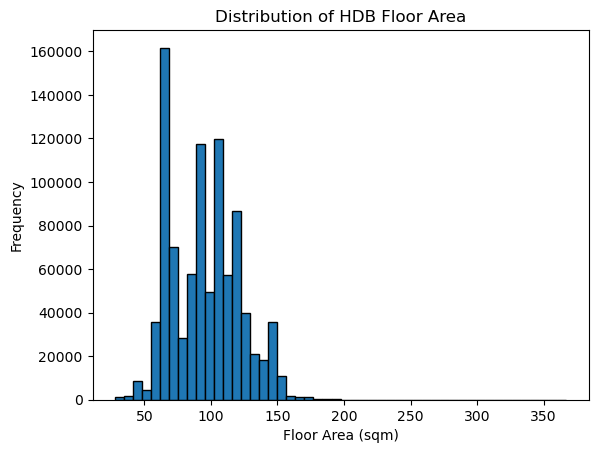

terrace               66
maisonette            16
premium maisonette     7
apartment              4
adjoined flat          1
Name: flat_model, dtype: int64

In [16]:

# Plot histogram of floor area
plt.hist(prices['floor_area_sqm'], bins=50, edgecolor='black')
plt.title('Distribution of HDB Floor Area')
plt.xlabel('Floor Area (sqm)')
plt.ylabel('Frequency')
plt.show()

# Display counts of flat models with floor area greater than 200 sqm
large_flats = prices[prices['floor_area_sqm'] > 200]['flat_model'].value_counts()
display(large_flats)


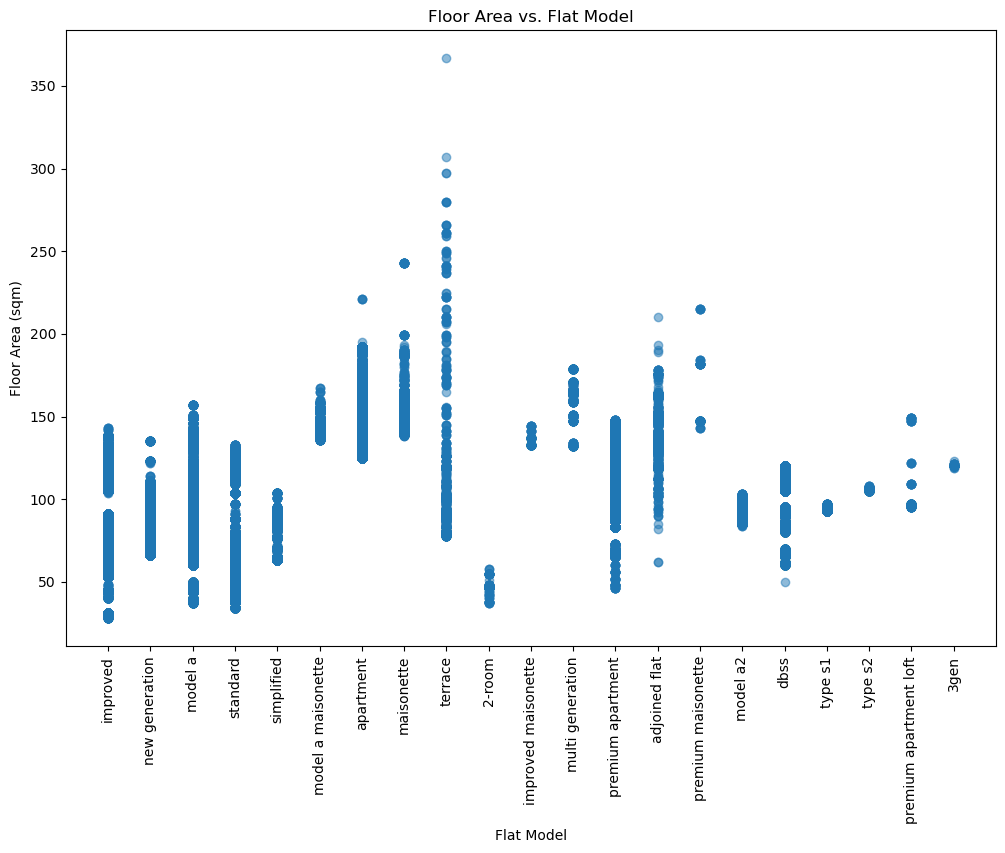

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(prices['flat_model'], prices['floor_area_sqm'], alpha=0.5)
plt.xticks(rotation=90)
plt.title('Floor Area vs. Flat Model')
plt.xlabel('Flat Model')
plt.ylabel('Floor Area (sqm)')
plt.show()


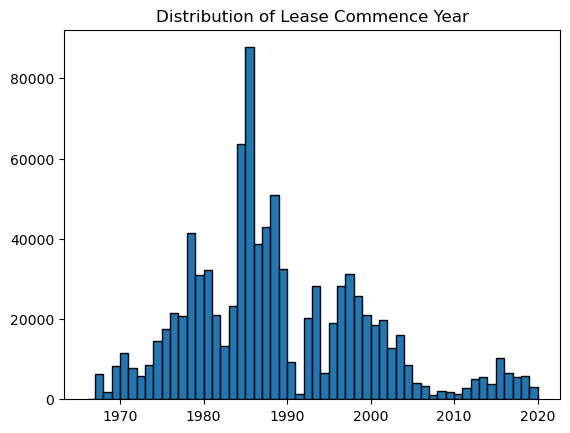

In [18]:
bins = prices['lease_commence_date'].max() - prices['lease_commence_date'].min()
plt.hist(prices['lease_commence_date'], bins=bins, edgecolor='black')
plt.title('Distribution of Lease Commence Year')
plt.show()

In [19]:
import pandas as pd

# Load the dataset
df_resale = pd.read_csv('C:/Users/Bwah/Desktop/488 Dataset/output2.0.csv')

# Ensure there are no missing values in 'block' and 'street_name'
df_resale['block'] = df_resale['block'].fillna('')
df_resale['street_name'] = df_resale['street_name'].fillna('')

# Concatenate 'block' and 'street_name' to form the 'address'
df_resale['address'] = df_resale['block'] + ' ' + df_resale['street_name']

# Get the list of all addresses and find unique addresses
all_address = list(df_resale['address'])
unique_address = list(set(all_address))

# Print the number of unique addresses
print("Unique addresses out of 932,373 housing transactions:", len(unique_address))


C:\Users\Bwah\AppData\Local\Temp\ipykernel_20084\191490434.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df_resale = pd.read_csv('C:/Users/Bwah/Desktop/488 Dataset/output2.0.csv')


Unique addresses out of 932,373 housing transactions: 9841


In [20]:
# prompt: print head of df_resale

df_resale.head()


,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,resale_price,remaining_lease,flat_group,address
0,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,10 to 12,31.0,improved,1977,9000.0,NaN,basic types,309 ang mo kio ave 1
1,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,04 to 06,31.0,improved,1977,6000.0,NaN,basic types,309 ang mo kio ave 1
2,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,10 to 12,31.0,improved,1977,8000.0,NaN,basic types,309 ang mo kio ave 1
3,1990-01-01,ang mo kio,1 room,309,ang mo kio ave 1,07 to 09,31.0,improved,1977,6000.0,NaN,basic types,309 ang mo kio ave 1
4,1990-01-01,ang mo kio,3 room,216,ang mo kio ave 1,04 to 06,73.0,new generation,1976,47200.0,NaN,basic types,216 ang mo kio ave 1


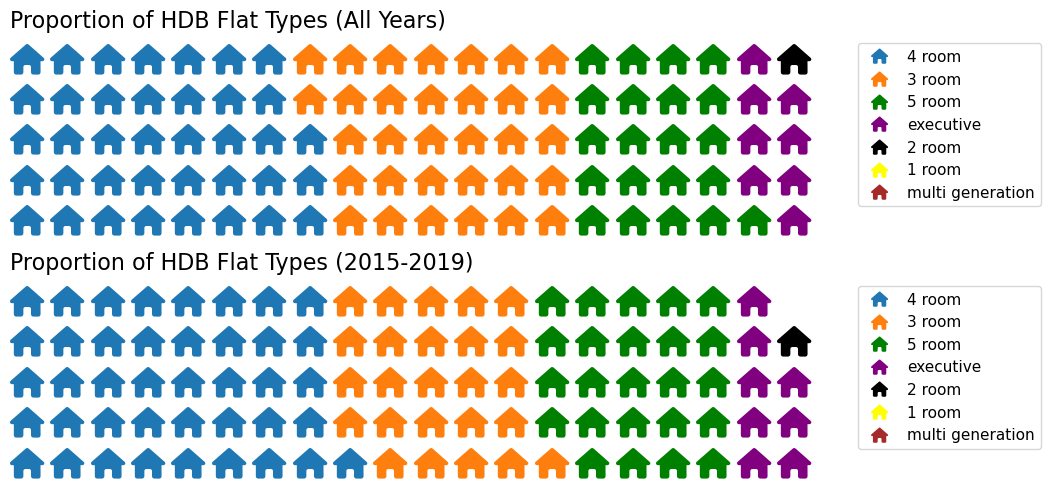

In [21]:
!pip install pywaffle
from pywaffle import  Waffle

flattype = dict(prices['flat_type'].value_counts()/len(prices)*100)
flattype1519 = dict(prices.set_index('month')['2015':'2019'].reset_index()['flat_type'].value_counts()/len(prices.set_index('month')['2015':'2019'].reset_index())*100)

plt.figure(figsize=(10,5),
    FigureClass=Waffle, 
    plots={
        211: {
            'values': flattype,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':11},
            'title': {'label': 'Proportion of HDB Flat Types (All Years)', 'loc': 'left', 'fontsize':16}
        },
        212: {
            'values': flattype1519,
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize':11},
            'title': {'label': 'Proportion of HDB Flat Types (2015-2019)', 'loc': 'left', 'fontsize':16}            
        },
    },
    rows=5, 
    colors=["#1f77b4", "#ff7f0e", "green", 'purple', 'black', 'yellow', 'brown'],
    #colors=["#3c78d8", "#00cef6", "#aff000", '#28324a', 'black', 'yellow', 'brown'],
    icons='home', 
    font_size=22, 
    icon_legend=True)
    
plt.show()


In [24]:
!pip install joypy

import joypy
fig, axes = joypy.joyplot(prices1519, by="flat_type_year", column="real_price",figsize=(9,7),
             linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))
axes[-1].set_xlim([0,1200000])
axes[-1].set_xticklabels(['0', '200k', '400k', '600k', '800k', '1000k', '1200k', '1400k']) 
plt.xlabel('Resale Price SGD ($)', fontsize=14)
fig.show()

  Obtaining dependency information for joypy from https://files.pythonhosted.org/packages/e9/8c/4d32c8935431eb10fd140faa4b13b6b8de222223a88fa9ad2a7711b7f1a9/joypy-0.2.6-py2.py3-none-any.whl.metadata


C:\Users\Bwah\AppData\Local\Temp\ipykernel_20084\3722909506.py:5: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  linewidth=0.05,overlap=1.5,alpha=0.8,colormap=plt.cm.get_cmap('tab20',4))


KeyError: 'flat_type_year'